# Utility Functions
There are several functions in the util module. Here are some I think are useful.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util
from skimage.external import tifffile

## dtype_limits
> Return intensity limits, i.e. (min, max) tuple, of the image’s dtype.

We could just use im.dtype to check image's dtype...

In [13]:
im = data.camera()
print 'data.camera has the dtype_limits: %s' % (util.dtype_limits(im),)
im = data.chelsea()
print 'data.chelsea (color image) has the dtype_limits: %s' % (util.dtype_limits(im),)
im = tifffile.imread('/Users/zhouzhou/Dropbox/App/spyder/ExploreSkimage/NOR_RC053_#1.tif')
print 'NOR_RC053_#1 has the dtype_limits: %s' % (util.dtype_limits(im),)
im = tifffile.imread('/Users/zhouzhou/Dropbox/App/spyder/ExploreSkimage/DSM_reconstructed_crop-2.tif')
print 'data.DSM_reconstruction_crop-2 (3D image) has the dtype_limits: %s' % (util.dtype_limits(im),)

data.camera has the dtype_limits: (0, 255)
data.chelsea (color image) has the dtype_limits: (0, 255)
NOR_RC053_#1 has the dtype_limits: (0, 65535)
data.DSM_reconstruction_crop-2 (3D image) has the dtype_limits: (0, 255)


## img_as_uint
> Convert an image to 16-bit unsigned integer format.

> Negative input values will be clipped. Positive values are scaled between 0 and 65535.

In [15]:
im = data.camera()
im_as_uint = util.img_as_uint(im)
print 'data.camera\'s dtype: %s' % im.dtype
print 'data.camera_as_uint\'s dtype: %s' % im_as_uint.dtype

data.camera's dtype: uint8
data.camera_as_uint's dtype: uint16


51 93
13107 23901


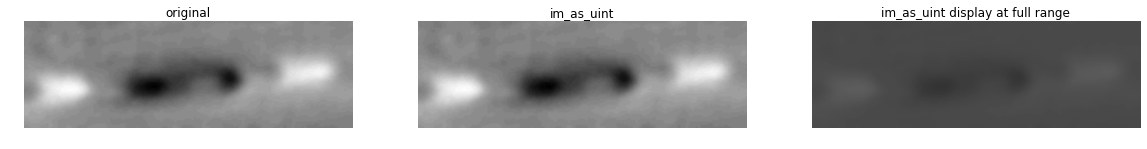

In [34]:
im = tifffile.imread('/Users/zhouzhou/Dropbox/App/spyder/ExploreSkimage/DSM_reconstructed_crop-2.tif')
im = im[200,:,:]
im_as_uint = util.img_as_uint(im)

plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots(1,3)

ax[0].imshow(im, cmap='gray')
ax[0].axis('off')
ax[0].set_adjustable('box-forced')
ax[0].set_title('original')

ax[1].imshow(im_as_uint, cmap='gray')
ax[1].axis('off')
ax[1].set_adjustable('box-forced')
ax[1].set_title('im_as_uint')

ax[2].imshow(im_as_uint, vmin=0, vmax=65535, cmap='gray')
ax[2].axis('off')
ax[2].set_adjustable('box-forced')
ax[2].set_title('im_as_uint display at full range')

print im.min(), im.max()
print im_as_uint.min(), im_as_uint.max()

# img_as_ubyte
> Convert an image to 8-bit unsigned integer format

> Negative input values will be clipped. Positive values are scaled between 0 and 255.

In [21]:
im = data.camera()
im_16bit = util.img_as_uint(im)
im_8bit_back = util.img_as_ubyte(im_16bit)
print np.array_equal(im, im_8bit_back)

True


/Users/zhouzhou/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


## img_as_float
> Convert an image to double-precision floating point format.

> The range of a floating point image is [0.0, 1.0] or [-1.0, 1.0] when converting from unsigned or signed datatypes, respectively.


In [29]:
im = data.camera()
im_float = util.img_as_float(im)
print im_float.dtype
print util.dtype_limits(im_float)
print im_float.min(), im_float.max()

float64
(0, 1)
0.0 1.0


In [31]:
im = tifffile.imread('/Users/zhouzhou/Dropbox/App/spyder/ExploreSkimage/NOR_RC053_#1.tif')
im_float = util.img_as_float(im)
print im_float.dtype
print util.dtype_limits(im_float)
print im.min(), im.max()
print im_float.min(), im_float.max()

float64
(0, 1)
5467 65535
0.0834210727092 1.0
